In [253]:
import os
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import cv2
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from mask_generator.utils import DatasetLoaderFactory
from mask_generator.transforms import AlbumentationsTrainTransform

In [254]:
TRAIN_DATASET_PATH = '/root/MaskGenerator/Datasets/train/simu_v0'

pairs = DatasetLoaderFactory.get_loader(TRAIN_DATASET_PATH).get_pairs()
print(f"Number of pairs: {len(pairs)}")

Number of pairs: 4817


Selected pair: ['/root/MaskGenerator/Datasets/train/simu_v0/Images/image_277591c2-1cab-4a0f-9e94-e563ab18e998.png'
 '/root/MaskGenerator/Datasets/train/simu_v0/Masks/mask_277591c2-1cab-4a0f-9e94-e563ab18e998.png']


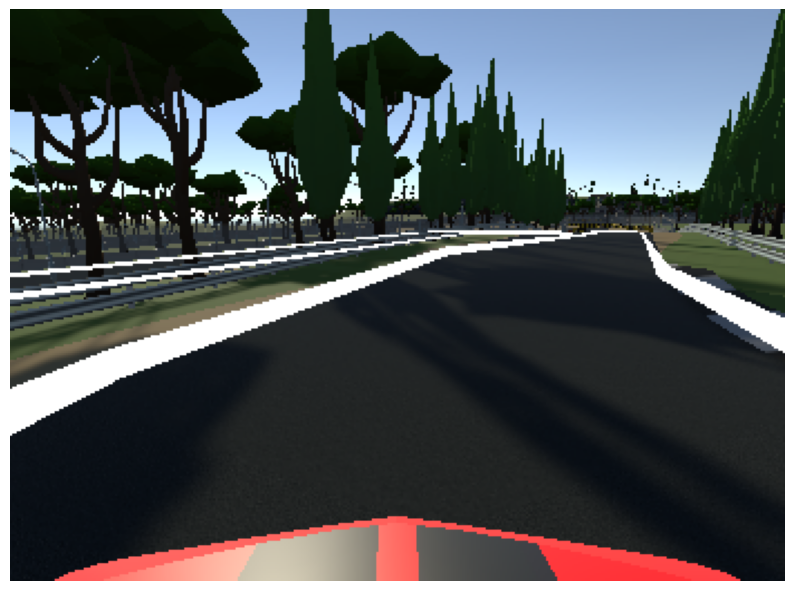

In [255]:
pair = random.choice(pairs)
print(f"Selected pair: {pair}")

original_image = cv2.imread(pair[0])
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10, 10))
plt.imshow(original_image)
plt.axis('off')
plt.show()

In [256]:
PAD_DIVISOR = 32
AUGMENTATION_NAMES = ["blur", "noise", "dropout", "geometry", "color_invariance", "color_variation", "weather"]

transform = AlbumentationsTrainTransform(seed=42, pad_divisor=PAD_DIVISOR, augmentations_names=AUGMENTATION_NAMES)

Using augmentations: ['blur', 'noise', 'dropout', 'geometry', 'color_invariance', 'color_variation', 'weather']


In [257]:
image = transform(image=original_image)

print(f"Transformed image shape: {image.shape}")

denormalized_image = transform.denormalize(image)
image_np = denormalized_image.permute(1, 2, 0).numpy()

Transformed image shape: torch.Size([3, 256, 256])


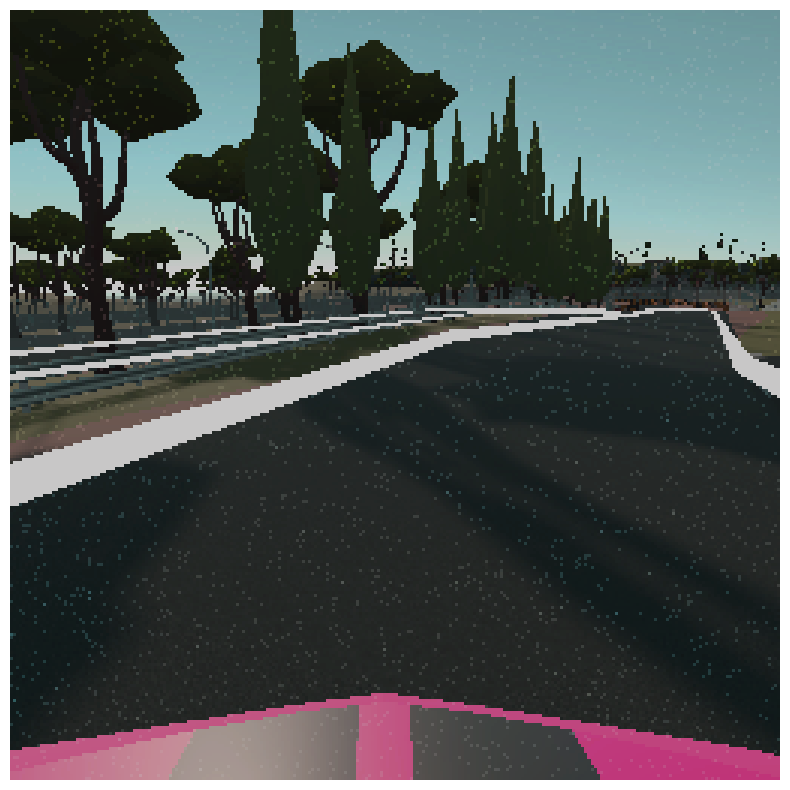

In [258]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(image_np)
plt.axis('off')
plt.show()